# EDSA CLIMATE CHANGE CHALLANGE

Companies would like to know what sentiments toward climate change their clients have. To do so, they will need a tool that predicts the sentiments of their clientson matters cliemate change. In this challneg I will build a sentiment analysis predictive model based on tweet data.

## Metric for success

A classification model with an F1 score of above 65% on unseen data.


## Workflow

* Data cleaning
* Text preprocessing
* Feature engineering
* Modeling
* Hyperparameter tuning
* Conclusion

#### 1. Loading libraries and data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-climate-change-belief-analysis-2021/sample_submission.csv
/kaggle/input/edsa-climate-change-belief-analysis-2021/train.csv
/kaggle/input/edsa-climate-change-belief-analysis-2021/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV


In [3]:
train=pd.read_csv('/kaggle/input/edsa-climate-change-belief-analysis-2021/train.csv')
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
test=pd.read_csv('/kaggle/input/edsa-climate-change-belief-analysis-2021/test.csv')
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


#### 2. Data cleaning

In [5]:
#Creating a common column in test and train dataset for easy concatenation
train['train']=1
test['train']=0

In [6]:
#Concatenating train and test dataset so as to apply similar dataprocessing before modeling
combined=pd.concat([train,test])
combined

,sentiment,message,tweetid,train
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,1
1,1.0,It's not like we lack evidence of anthropogeni...,126103,1
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,1
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,1
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,1
...,...,...,...,...
10541,NaN,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,0
10542,NaN,2016: the year climate change came home: Durin...,875167,0
10543,NaN,RT @loop_vanuatu: Pacific countries positive a...,78329,0
10544,NaN,"RT @xanria_00018: You’re so hot, you must be t...",867455,0


In [7]:
combined.head()

,sentiment,message,tweetid,train
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,1
1,1.0,It's not like we lack evidence of anthropogeni...,126103,1
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,1
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,1
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,1


In [8]:
#checking for null values
combined.isnull().sum()

sentiment    10546
message          0
tweetid          0
train            0
dtype: int64

The null values as as a result of the missing sentiments column in the test dataset, there was no need to drop them.

In [9]:
df=combined #Renaming combined dataframe 

In [10]:
#checking the datatypes of the columns
df.dtypes

sentiment    float64
message       object
tweetid        int64
train          int64
dtype: object

#### Univariate analaysis

 1.0    8530
 2.0    3640
 0.0    2353
-1.0    1296
Name: sentiment, dtype: int64


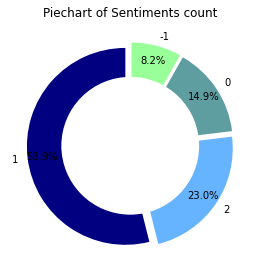

In [11]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['1','2','0','-1']
sizes = df['sentiment'].value_counts()
#colors
print(sizes)
colors = ['navy','#66b3ff','#5F9EA0','#99ff99']
#explsion
explode = (0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#Adjusts chart size
sns.set(rc={'figure.figsize':(16, 8)})
plt.title('Piechart of Sentiments count') 
plt.tight_layout()
plt.show()

Based on the piechart, 53.9% of the sentiments are 1, followed by 23% and 14.9% for 2 and 0 respectively and lastly -1.

#### Text preprocessing

In [12]:
# Import necessary libraries
#We start by loading the libraries necessary for this script:
import requests
import matplotlib.pyplot as plt
import tensorflow as tf

# Import libraries
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import re # relgular expressions
import string


from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
# Graphics

# Wordcloud
from wordcloud import WordCloud

In [13]:
#Displaying an item in the dataframe that will be used to confirm the text processing
df['message'].iloc[2]

'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…'

In [14]:
#Removing the twitter uernames/handles
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
from nltk.tokenize import word_tokenize



In [15]:
#Removing urls
def clean_url(review_text):
    return re.sub(r'http\S+','', review_text)
df['cleanmessage']=df['message'].apply(clean_url)

In [16]:
# Convering text to lowercase
def lower(text):
    return str(text).lower()
df['cleanmessage']=df['cleanmessage'].apply(lower)



In [17]:
#Tokenizing the text
def tokenizer(text):
    return tknzr.tokenize(text)
df['cleanmessage']=df['cleanmessage'].apply(tokenizer)



In [18]:
#Converting tokens to a string message again
def to_string(list_message):
    return ' '.join(list_message)
df['cleanmessage']=df['cleanmessage'].apply(to_string)

In [19]:
#Removing the non numerical values in the tweets
def clean_non_num(text):
    return re.sub('[^a-zA-Z]',' ', text)
df['cleanmessage']=df['cleanmessage'].apply(clean_non_num)



In [20]:
#Tokenizing text
def tokenizer(text):
    return word_tokenize(text)
df['cleanmessage']=df['cleanmessage'].apply(tokenizer)


In [21]:
#Removing stopwords
import nltk
from nltk.corpus import stopwords # Stop words are generally the most common words in a language
                                   
stop_words=set(stopwords.words('english'))
    

def stop_word_out(token):
    return [item for item in token if item not in stop_words]
df['cleanmessage']=df['cleanmessage'].apply(stop_word_out)


In [22]:
#Lematizing text
def lemmatize(token):
    return [lemma.lemmatize(word=w, pos='v') for w in token]
df['cleanmessage']=df['cleanmessage'].apply(lemmatize)


In [23]:
#droping words with 2 or less than 2 characters
def length_check(token):
    return [i for i in token if len(i)>2]
df['cleanmessage']=df['cleanmessage'].apply(length_check)


In [24]:
df['cleanmessage'].iloc[3906]

['music',
 'science',
 'combine',
 'monitor',
 'climate',
 'change',
 'climateaction',
 'earthoptimism']

In [25]:
#Restoring processed texts to strings again.
def to_string(list_message):
    return ' '.join(list_message)
df['cleanmessage']=df['cleanmessage'].apply(to_string)


In [26]:
df['cleanmessage'].iloc[1111] #Testing the text preprocessing

'trump environmental protection agency delete climate change web page'

In [27]:
#Renaming the columns of the dataframe
df['unrefined']=df['message']
df['message']=df['cleanmessage']

In [28]:
df

,sentiment,message,tweetid,train,cleanmessage,unrefined
0,1.0,polyscimajor epa chief think carbon dioxide ma...,625221,1,polyscimajor epa chief think carbon dioxide ma...,PolySciMajor EPA chief doesn't think carbon di...
1,1.0,like lack evidence anthropogenic global warm,126103,1,like lack evidence anthropogenic global warm,It's not like we lack evidence of anthropogeni...
2,2.0,researchers say three years act climate change...,698562,1,researchers say three years act climate change...,RT @RawStory: Researchers say we have three ye...
3,1.0,todayinmaker wire pivotal year war climate change,573736,1,todayinmaker wire pivotal year war climate change,#TodayinMaker# WIRED : 2016 was a pivotal year...
4,1.0,racist sexist climate change deny bigot lead p...,466954,1,racist sexist climate change deny bigot lead p...,"RT @SoyNovioDeTodas: It's 2016, and a racist, ..."
...,...,...,...,...,...,...
10541,NaN,brb write poem climate change climatechange sc...,895714,0,brb write poem climate change climatechange sc...,"RT @BrittanyBohrer: Brb, writing a poem about ..."
10542,NaN,year climate change come home hottest year rec...,875167,0,year climate change come home hottest year rec...,2016: the year climate change came home: Durin...
10543,NaN,pacific countries positive fiji lead global cl...,78329,0,pacific countries positive fiji lead global cl...,RT @loop_vanuatu: Pacific countries positive a...
10544,NaN,hot must cause global warm aldublaboroflove,867455,0,hot must cause global warm aldublaboroflove,"RT @xanria_00018: You’re so hot, you must be t..."


#### Modeling

In [29]:
train=df[df['train']==1]
test=df[df['train']==0]

In [30]:
y = train['sentiment']
X = train['message']

##### Vectorization

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=1, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

##### Handling class imbalance

In [32]:
from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE(sampling_strategy="not majority") #SMOTE is used to handle the class imbalance before modeling
X_sm, y_sm = smote.fit_resample(X_vectorized, y)

##### Splitting train and test set

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=.3, random_state=11)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

##### 1. Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB

# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
mnb = MultinomialNB()
mnb.fit(X_train, y_train) 

y_pred_test = mnb.predict(X_test)
print(f1_score(y_test, y_pred_test, average="macro"))
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))


0.8394026466108163
              precision    recall  f1-score   support

        -1.0       0.86      0.94      0.90      2577
         0.0       0.84      0.89      0.87      2549
         1.0       0.89      0.61      0.72      2596
         2.0       0.80      0.94      0.86      2514

    accuracy                           0.84     10236
   macro avg       0.85      0.85      0.84     10236
weighted avg       0.85      0.84      0.84     10236



##### 2. Logistic Regression Classifier

In [35]:

from sklearn.linear_model import LogisticRegression
# Here 'ovr' indicates that we have selected our One-vs-Rest strategy. 
logreg = LogisticRegression(multi_class='ovr')

logreg.fit(X_train, y_train)
# Generate predictions
y_pred_test = logreg.predict(X_test)

print(f1_score(y_test, y_pred_test, average="macro"))

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8580619808125052
              precision    recall  f1-score   support

        -1.0       0.93      0.87      0.90      2577
         0.0       0.84      0.87      0.85      2549
         1.0       0.83      0.77      0.80      2596
         2.0       0.84      0.92      0.88      2514

    accuracy                           0.86     10236
   macro avg       0.86      0.86      0.86     10236
weighted avg       0.86      0.86      0.86     10236



##### 3. KNN classifier

In [36]:
n_neighbors = 4 # <--- change this number to play around with how many nearest neighbours to look for.

knn = KNeighborsClassifier(n_neighbors)
# Fit the model 
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
print(f1_score(y_test, y_pred_test, average="macro"))
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

0.6833660739294737
              precision    recall  f1-score   support

        -1.0       0.69      0.97      0.81      2577
         0.0       0.66      0.87      0.75      2549
         1.0       0.98      0.20      0.33      2596
         2.0       0.82      0.88      0.85      2514

    accuracy                           0.73     10236
   macro avg       0.79      0.73      0.68     10236
weighted avg       0.79      0.73      0.68     10236



##### 4. Random forest classifier

In [37]:
rf=RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=23) 
rf.fit(X_train, y_train)

y_pred_test = rf.predict(X_test)
print(f1_score(y_test, y_pred_test, average="macro"))
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

0.5962451505044801
              precision    recall  f1-score   support

        -1.0       0.82      0.64      0.71      2577
         0.0       0.62      0.47      0.54      2549
         1.0       0.65      0.43      0.52      2596
         2.0       0.48      0.87      0.62      2514

    accuracy                           0.60     10236
   macro avg       0.64      0.60      0.60     10236
weighted avg       0.64      0.60      0.60     10236



##### 5. Linear Support Vector Classifier

In [38]:
from sklearn.svm import LinearSVC
ls=LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0)
ls.fit(X_train, y_train)

y_pred_test = ls.predict(X_test)
#Check the f1 score
print(f1_score(y_test, y_pred_test, average="macro"))
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

0.9174081047356781
              precision    recall  f1-score   support

        -1.0       0.95      0.97      0.96      2577
         0.0       0.89      0.97      0.93      2549
         1.0       0.94      0.78      0.85      2596
         2.0       0.90      0.96      0.93      2514

    accuracy                           0.92     10236
   macro avg       0.92      0.92      0.92     10236
weighted avg       0.92      0.92      0.92     10236



#### Results

The F1 scores of the 5 models
Naive Bayes-0.84
Logistic Regression-0.84
Random Forest-0.57
K-Nearest Neighbour-0.68
Linear Support Vector Classifier-0.92

The linear support vector classifier performed the based with an F1 score of 0.92.


In [39]:
# from sklearn.pipeline import Pipeline
# # Create a pipeline
# pipe = Pipeline([("classifier", RandomForestClassifier())])
# # Create dictionary with candidate learning algorithms and their hyperparameters
# grid_param = [  {"classifier": [MultinomialNB()],
#                   "classifier__alpha": [1, 1e-1, 1e-2]
#                  },
              
           
              
#                 {"classifier": [LinearSVC()],
#                 "classifier__C":[1, 10, 100],
#                 # "classifier__gamma":[0.1, 0.01]
#                 },               
#                 {"classifier": [LogisticRegression()],
#                  "classifier__penalty": ['l2','l1'],
#                  "classifier__C": np.logspace(0, 4, 10)
#                  },
#                 {"classifier": [LogisticRegression()],
#                  "classifier__penalty": ['l2'],
#                  "classifier__C": np.logspace(0, 4, 10),
#                  "classifier__solver":['newton-cg','saga','sag','liblinear'] # The solver does not allow for 'l1' penalty
#                  },
#                 {"classifier": [RandomForestClassifier()],
#                  "classifier__n_estimators": [10, 100, 1000],
#                  "classifier__max_depth":[5,8,15,25,30,None],
#                  "classifier__min_samples_leaf":[1,2,5,10,15,100],
#                  "classifier__max_leaf_nodes": [2, 5,10]}
#               ]

# gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1, scoring='f1_macro') # Fit grid search
# best_model = gridsearch.fit(X_train,y_train) #Find the best model


#### Testing on unseen data generating submission  file

In [40]:
#Vectorizing the test dataset
vect_text = vectorizer.transform(test['message'])
# Creating sentiment column in the test dataset containing predictions from the model.
test['sentiment']=ls.predict(vect_text).reshape(-1,1)
test['sentiment']=test['sentiment'].astype(int)

test[['tweetid', 'sentiment']].to_csv('final_svc.csv')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
